# Vibrações Livres e Amortecidas - 1 Grau de Liberdade
 _Prof. Tito Dias Júnior_

## Exemplo 1: Sistema Amortecido

Uma massa, como mostrada na Figura, está sujeita ao movimento vertical sob a influência de uma mola de constante de elasticidade $k$ e um amortecedor viscoso de constante $c$. Resolva a equação governante do movimento harmônico resultante. Mostre graficamente o movimento da massa em oscilação.

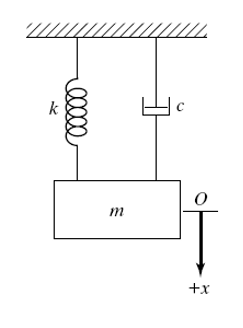

A equação governante é:

$m\ddot{x} + c \dot{x} +kx = 0$

Considere os seguintes valores conhecidos:

$m = 450.0, k = 26519.2, c = 1000.0, x_0 = 0.539657, \dot{x}_0 = 1.0$

### **Solução**

Para a solução do problema temos que utilizar um método para integração de equações diferenciais. O módulo _scipy_ possui a classe _scipy.integrate.ode_ para a solução de equações diferenciais ordinárias de primeira ordem. O nosso problema envolve uma equação diferencial de segunda ordem, portanto para utilizar o _scipy_ precisamos manipular matematicamente o nosso problema para transformá-lo de uma equação segunda ordem para um sistema de equações de primeir ordem. Para isso, basta definirmos mais uma variável
 $ y = \dot{x}  $, que é equivalente a $\dot{x} = y$ representando uma equação diferencial de primeira ordem. Derivando-a obtemos $ \ddot{x} = \dot{y} $ e substitundo na equação governante finalmente obtemos a segunda equação diferencial ordinária de primeira ordem:
 
 $ m \dot{y} + cy + kx = 0$
 
 E reescrevendo as equações na forma de um sistema de equações diferenciais ordinárias, podemos obter:
 
 $ \dot{x} = y $ <br> 
 $ \dot{y}= \frac{-cy - kx}{m} $

Com as condições iniciais $\dot{x}(0) = x_0 $ e $ \dot{y}(0) = \dot{x}_0$

Para o programa, vamos precisar do módulo  _scipy_ para a integração e o _pylab_ para plotar os resultados.

Inicialmente, vamos definir, como uma função, o sistema de equações que será chamado posteriormente:

In [2]:
def sistema(w, t, p):
    """
    Define o sistema de equações diferenciais para o sistema.

    Argumentos:
        w :  vetor das variáveis de estado
                  w = [x,y]
        t :  tempo
        p :  vetor de parâmetros conhecidos
                  p = [m,k,c]
    """
    x, y = w
    m, k, c = p

    # Cria a função f = (x',y'):
    f = [y,
         (-c * y - k * x) / m]
    return f

Agora podemos escrever a parte do programa para efetuar a integração do sistema de EDO:

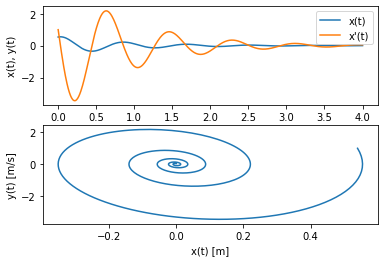

In [3]:
import numpy as np       # Importa o módulo numpy (métodos numéricos)
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# variáveis dos enunciado
m = 450.                # Massa
k = 26519.2             # Coeficiente de mola
c = 1000.0              # Coeficiente de amortecimento viscoso

x0 = 0.539657          # Condição inicial para x0
y0 = 1.0               # Condição inicial para y0

# Parâmetros e critérios de parada do algoritmo de integração ODE
abserr = 1.0e-8        # Erro absoluto
relerr = 1.0e-6        # Erro relativo
stoptime = 4.0        # Tempo final de integração
numpoints = 550        # Número de pontos de integração

# Cria o vetor com os valores dos tempos de integração para utiliza no plot
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]


# Agrupando os parâmetros e condições iniciais par ao algoritmo:
p = [m, k, c]
w0 = [x0, y0]

# Chamada ao algoritmo de integração 
wsol = odeint(sistema, w0, t, args=(p,),atol=abserr, rtol=relerr)

# Separa a solução nos vetores x e y
x = wsol[:,0]
y = wsol[:,1]


# Plotando o resultado
plt.figure()         # Define uma figura para plotar
                     # Figura é formada por dois subplots

plt.subplot(211)     # Primeira forma de solução
plt.plot(t,x, label="x(t)")
plt.plot(t,y, label="x'(t)")
plt.legend()
plt.xlabel('t [s]')
plt.ylabel('x(t), y(t)')

plt.subplot(212)     # Segunda forma de solução
plt.plot(x,y)
plt.xlabel('x(t) [m]')
plt.ylabel('y(t) [m/s]')


plt.show()






### Exemplo 2: Amortecedor Subamortecido

Um amortecedor subamortecido deve ser projetado para uma motocicleta de 200 kg de massa (Fig. 2.30 (a)).
Quando o amortecedor é submetido a uma velocidade vertical inicial devido a um solavanco na estrada, o resultado a curva de deslocamento-tempo deve ser conforme indicado na Fig. 2.30 (b). 

Encontre as constantes de rigidez e de amortecimento necessárias para o amortecedor, se o período amortecido de vibração for de 2s e a amplitude $𝑥_1$ deve ser reduzida a um quarto em meio ciclo ($𝑥_{1,5}=𝑥_1/4$). 

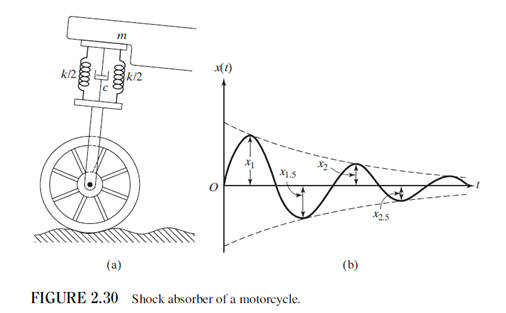

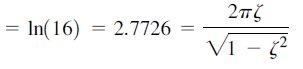

In [17]:

from sympy import * 

m = 200   # Massa em kg 
t = 2.0     # Período em s

# Cálculo das propriedades do sistema
x1porx2 = 16
#Decremento logarítmico (delta)
d = log(x1porx2)

# Cálculo do Zeta
x = Symbol('x') 
z = solve(2*np.pi*x/(sqrt(1-x**2))-d,x)
z = z[0]

print('zeta = ',z)

# Cálculo da vibração amortecida - 
wn = 2*np.pi/(t*sqrt(1-z**2))
print('wn = ',wn)

# Constante Crítica de amortecimento
cc = 2*m*wn
print('cc = ', cc)

# Constante de amortecimento
c = z*cc
print('c = ', c)

# Constante de Mola
k = m*wn**2
print('k = ', k)






zeta =  0.403712751943420
wn =  3.43386319715305
cc =  1373.54527886122
c =  554.517744447956
k =  2358.28329135243


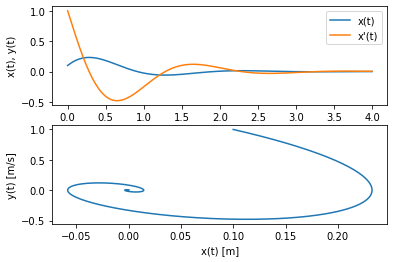

In [13]:
# Resolve novamente o sistema considerando os parâmetros calculados

x0 = 0.10              # Condição inicial para x0
y0 = 1.0               # Condição inicial para y0

# Parâmetros e critérios de parada do algoritmo de integração ODE
abserr = 1.0e-8        # Erro absoluto
relerr = 1.0e-6        # Erro relativo
stoptime = 4.0        # Tempo final de integração
numpoints = 550        # Número de pontos de integração

# Cria o vetor com os valores dos tempos de integração para utiliza no plot
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]


# Agrupando os parâmetros e condições iniciais par ao algoritmo:
p = [m, k, c]
w0 = [x0, y0]

# Chamada ao algoritmo de integração 
wsol = odeint(sistema, w0, t, args=(p,),atol=abserr, rtol=relerr)

# Separa a solução nos vetores x e y
x = wsol[:,0]
y = wsol[:,1]


# Plotando o resultado
plt.figure()         # Define uma figura para plotar
                     # Figura é formada por dois subplots

plt.subplot(211)     # Primeira forma de solução
plt.plot(t,x, label="x(t)")
plt.plot(t,y, label="x'(t)")
plt.legend()
plt.xlabel('t [s]')
plt.ylabel('x(t), y(t)')

plt.subplot(212)     # Segunda forma de solução
plt.plot(x,y)
plt.xlabel('x(t) [m]')
plt.ylabel('y(t) [m/s]')


plt.show()






## Referências

Kiusalaas, J. (2013). **Numerical Methods in Engineering With Python 3**. Cambridge: Cambridge.<br>
S. Rao. (2012) **Vibrações Mecânicas**. Prentice Hall, 4.ª ed. 